In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
ls


gdrive/  sample_data/


In [3]:
cd gdrive/My\ Drive/Colab\ Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [4]:
ls


'Copy of Offensive_tweets.ipynb'   Data_integ.npy    RML2016.10b.tar.bz2
 Data3.npy                         LICENSE.TXT
 Data_diff.npy                     RML2016.10b.dat


In [5]:
!wget  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2 

--2019-05-06 01:26:30--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2.1’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  14.7MB/s    in 2m 5s   

2019-05-06 01:28:35 (9.50 MB/s) - ‘RML2016.10b.tar.bz2.1’ saved [1245608913/1245608913]



In [0]:
!tar xjf "RML2016.10b.tar.bz2"

In [7]:
import os,random
import numpy as np
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *
from keras.optimizers import adam
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, random, sys, keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
DataLoaded = pickle.load(open("RML2016.10b.dat",'rb'))
Inphases,Quadratures = map(lambda j: sorted(list(set(map(lambda x: x[j], DataLoaded.keys())))), [1,0])
Data = []  
Labels = []
for Quadrature in Quadratures:
    for Inphase in Inphases:
#       data index with this modulation and snr
        Data.append(DataLoaded[(Quadrature,Inphase)])
#         append labels
        for i in range(DataLoaded[(Quadrature,Inphase)].shape[0]):  Labels.append((Quadrature,Inphase))
Data = np.vstack(Data)

In [9]:
print(Data.shape)

(1200000, 2, 128)


In [10]:
# modulation type and snr
print(Labels[0]) 


('8PSK', -20)


In [0]:
# Data_diff = np.apply_along_axis(np.gradient, 1, Data)

In [0]:
# print(Data_diff.shape)

In [0]:
# from scipy.integrate import cumtrapz

# Data_integ = np.apply_along_axis(cumtrapz, 1, Data,initial=0)

In [0]:
# print(Data_integ.shape)

In [0]:
# np.save('Data_integ', Data_integ)
Data_integ = np.load('Data_integ.npy')

In [0]:
# np.save('Data_diff', Data_diff)
Data_diff = np.load('Data_diff.npy')

In [0]:
print(Data_diff.shape)

(1200000, 2, 128)


In [0]:
# combining data with the differentiation
Data2 = []
for i in range(0,1200000):
   Data2.append(np.vstack((Data[i],Data_diff[i])))
    


In [0]:
# Data2=np.asarray(Data2)
# print(Data2.shape)

In [0]:
# np.save('Data2', Data2)
# Data2 = np.load('Data2.npy')

In [0]:
# combining data with the differentiation with the integration
Data3 = []
for i in range(0,1200000):
   Data3.append(np.vstack((Data2[i],Data_integ[i])))
    


In [0]:
Data3=np.asarray(Data3)
print(Data3.shape)

(1200000, 6, 128)


In [0]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
# np.save('Data3', Data3)
Data3 = np.load('Data3.npy')

# Split the data into 50% for training/validation and 50% for testing. 

In [11]:
from sklearn import preprocessing

LB = np.asarray(Labels)
x = preprocessing.LabelBinarizer()
x.fit(LB[:,0])
LB = x.transform(LB[:,0])
print(LB[0])


[1 0 0 0 0 0 0 0 0 0]


In [0]:
train_vectors = np.array(Data)[list(range(0,1200000,2)),:]
train_labels = np.array(Labels)[list(range(0,1200000,2))]

test_vectors = np.array(Data)[list(range(1,1200000,2)),:]
test_labels = np.array(Labels)[list(range(1,1200000,2))]




In [0]:
train_vectors1 = np.array(Data)[list(range(0,1200000,2)),:]
train_labels1 = np.array(LB)[list(range(0,1200000,2))]

test_vectors1 = np.array(Data)[list(range(1,1200000,2)),:]
test_labels1 = np.array(LB)[list(range(1,1200000,2))]



In [0]:
test_SNR=[]
test_mod_labels=[]
for i in range(0,20):
    test_SNR.append([])
    test_mod_labels.append([])
index_labels=[]
j=0
for i in range(-20,20,2):
    index_labels=np.where(test_labels[:,1]==str(i))  
    test_SNR[j]=test_vectors[index_labels]
    test_mod_labels[j]=test_labels1[index_labels]
    j=j+1

# print(test_vectors[test_final])

In [15]:
print(test_SNR[19])

[[[ 0.00444191  0.00536288  0.00592847 ... -0.00758315 -0.00645248
   -0.00467975]
  [-0.00551297 -0.00255853  0.00064903 ...  0.00381465  0.00426508
    0.00490362]]

 [[-0.00714165 -0.00658091 -0.00614939 ... -0.00352639 -0.00338763
   -0.00369235]
  [ 0.00332223  0.00407633  0.00479209 ... -0.00549915 -0.00366986
   -0.00144784]]

 [[-0.00124714 -0.00346337 -0.00539506 ...  0.00910653  0.00685997
    0.00380466]
  [ 0.00372067  0.00418886  0.00484475 ...  0.0018748   0.00194527
    0.0019868 ]]

 ...

 [[ 0.00140841  0.00143577  0.00137898 ...  0.00140089  0.00150922
    0.00134921]
  [-0.00761178 -0.00773952 -0.00759265 ... -0.0077767  -0.00763984
   -0.00773942]]

 [[ 0.0027236   0.00265014  0.00258855 ...  0.00280217  0.00278396
    0.00279103]
  [-0.00729888 -0.00731881 -0.00735847 ... -0.00736364 -0.00733167
   -0.00727415]]

 [[ 0.00492854  0.00492476  0.00497359 ...  0.00499452  0.00501002
    0.00498357]
  [-0.00602421 -0.00607515 -0.00603972 ... -0.00614814 -0.00601163
   -

In [16]:
print(Labels[0])

('8PSK', -20)


In [17]:
print(train_vectors.shape)

(600000, 2, 128)


# Fully Connected Neural Net as a baseline

In [0]:
# # use ReLU
# model = Sequential([
#     Dense(32, input_shape=(2, 128)), 
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

In [19]:
model = Sequential()
model.add(Reshape((256,), input_shape=(2, 128)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# fit
model.fit(train_vectors1,train_labels1, epochs=150, batch_size=1024, validation_split=0.05, verbose = 2, callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min")])


Instructions for updating:
Use tf.cast instead.
Train on 570000 samples, validate on 30000 samples
Epoch 1/150
 - 7s - loss: 1.8841 - acc: 0.2766 - val_loss: 3.1277 - val_acc: 0.0000e+00
Epoch 2/150
 - 4s - loss: 1.6532 - acc: 0.3567 - val_loss: 3.5403 - val_acc: 0.0010
Epoch 3/150
 - 4s - loss: 1.5622 - acc: 0.3832 - val_loss: 4.1733 - val_acc: 5.3333e-04
Epoch 4/150
 - 4s - loss: 1.4984 - acc: 0.4026 - val_loss: 5.3696 - val_acc: 0.0015
Epoch 5/150
 - 3s - loss: 1.4599 - acc: 0.4181 - val_loss: 6.0479 - val_acc: 6.0000e-04
Epoch 6/150
 - 3s - loss: 1.4232 - acc: 0.4334 - val_loss: 5.6121 - val_acc: 0.0016
Epoch 7/150
 - 3s - loss: 1.3822 - acc: 0.4499 - val_loss: 6.3419 - val_acc: 0.0026
Epoch 8/150
 - 3s - loss: 1.3370 - acc: 0.4669 - val_loss: 6.2651 - val_acc: 0.0058
Epoch 9/150
 - 3s - loss: 1.3036 - acc: 0.4776 - val_loss: 6.9500 - val_acc: 0.0048
Epoch 10/150
 - 3s - loss: 1.2784 - acc: 0.4858 - val_loss: 7.3588 - val_acc: 0.0052
Epoch 11/150
 - 3s - loss: 1.2564 - acc: 0.4934 

In [22]:
# evaluate
score=[]
for i in range(0,20):
    score.append([])
for i in range(0,20):
    score[i] = model.evaluate(test_SNR[i], test_mod_labels[i], verbose=0, batch_size=1024)
    print score[i]

[2.4608125358581545, 0.1043666666706403]
[2.4358488127390543, 0.10830000001589457]
[2.397446989949544, 0.11863333331743876]
[2.299991950352987, 0.1473]
[2.159911252085368, 0.1859333332935969]
[1.932959629758199, 0.24200000014305115]
[1.6498349215189616, 0.32126666661898295]
[1.3766827727953592, 0.40950000007947285]
[1.1135519207318625, 0.48943333339691164]
[0.9328516082763672, 0.5739666666905086]
[1.0425268264134724, 0.6225666666686535]
[1.2507484345277151, 0.6419333333335817]
[1.3721842816889287, 0.6301333333335817]
[1.4259764055798452, 0.6242333333333333]
[1.4462063947627941, 0.6202333333333333]
[1.477105741577844, 0.6161666666666666]
[1.4640056212708354, 0.6184666666666667]
[1.4727281496301294, 0.6185333333333334]
[1.467951887724797, 0.6197]
[1.4671259020383158, 0.6189666666666667]


In [0]:
x=[2,4,5]
print(np.sum(x)/float(np.ma.count(x)))

3.6666666666666665


# CNN

In [0]:
# # use ReLU
# model_CNN = Sequential([
#     Dense(32, input_shape=(2, 128)), 
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

In [23]:
model_CNN = Sequential()
model_CNN.add(Reshape((128,2,1), input_shape=(2,128)))
model_CNN.add(Conv2D(64, (1, 3), activation='relu', padding="same"))
model_CNN.add(Dropout(0.5))
model_CNN.add(Conv2D(16, (2,3), activation='relu', padding="same"))
model_CNN.add(Dropout(0.5))
model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dense(10, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# compile
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# fit
model_CNN.fit(train_vectors1, train_labels1, epochs=150, batch_size=1024, validation_split=0.05, verbose = 2, callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min")])


Train on 570000 samples, validate on 30000 samples
Epoch 1/150
 - 18s - loss: 1.8765 - acc: 0.2725 - val_loss: 3.2985 - val_acc: 1.6667e-04
Epoch 2/150
 - 15s - loss: 1.4993 - acc: 0.4148 - val_loss: 4.1929 - val_acc: 2.0000e-04
Epoch 3/150
 - 15s - loss: 1.3791 - acc: 0.4558 - val_loss: 5.6516 - val_acc: 0.0000e+00
Epoch 4/150
 - 15s - loss: 1.3378 - acc: 0.4684 - val_loss: 5.3871 - val_acc: 6.3333e-04
Epoch 5/150
 - 15s - loss: 1.3140 - acc: 0.4751 - val_loss: 5.9879 - val_acc: 6.6667e-04
Epoch 6/150
 - 15s - loss: 1.2989 - acc: 0.4795 - val_loss: 5.1534 - val_acc: 0.0019
Epoch 7/150
 - 15s - loss: 1.2880 - acc: 0.4836 - val_loss: 5.8419 - val_acc: 0.0050
Epoch 8/150
 - 15s - loss: 1.2756 - acc: 0.4878 - val_loss: 7.5303 - val_acc: 0.0011
Epoch 9/150
 - 15s - loss: 1.2643 - acc: 0.4922 - val_loss: 6.2984 - val_acc: 0.0035
Epoch 10/150
 - 15s - loss: 1.2511 - acc: 0.4973 - val_loss: 6.7797 - val_acc: 0.0042
Epoch 11/150
 - 15s - loss: 1.2413 - acc: 0.5004 - val_loss: 7.7402 - val_acc:

In [26]:
# evaluate
score_CNN=[]
for i in range(0,20):
    score_CNN.append([])
for i in range(0,20):
    score_CNN[i] = model_CNN.evaluate(test_SNR[i], test_mod_labels[i], verbose=0, batch_size=1024)
    print score_CNN[i]

[2.3656971342722577, 0.10396666671435038]
[2.3453581281026206, 0.1099666667064031]
[2.3109693010965984, 0.11576666663487752]
[2.222610205968221, 0.14036666666666667]
[2.0924519509633384, 0.18903333331743877]
[1.89409644724528, 0.2708666665712992]
[1.664254787349701, 0.33006666660308837]
[1.449299560801188, 0.40309999987284345]
[1.1383440096855164, 0.5065666669209798]
[0.8546087336858114, 0.6231333332935969]
[0.8753213849385579, 0.674666666662693]
[1.057419551785787, 0.6967000000002483]
[1.195745029727618, 0.6991666666666667]
[1.242094944747289, 0.7041333333333334]
[1.2680989934921265, 0.7012666666666667]
[1.2967507104555767, 0.7060333333333333]
[1.2999421029011409, 0.6993]
[1.2869795826276142, 0.7018]
[1.297013818828265, 0.7025666666666667]
[1.2925358929951987, 0.7013333333333334]


Text(0.5,1,'CNN accuracy against SNRs')

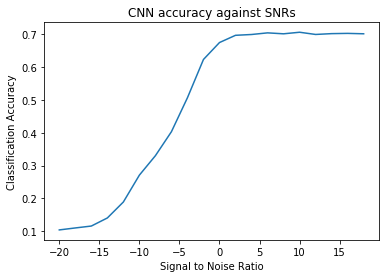

In [27]:
# Plot accuracy curve
temp=[]
for i in range(0,20):
    temp.append(score_CNN[i][1])
# print(temp)
plt.plot(Inphases, temp)
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN accuracy against SNRs")


**Report the average overall accuracy as well as the results at SNR=0dB. **

In [106]:
sum=0
for k in range (0,20):
    sum = sum + score_CNN[k][1]
   
  
  
print("Average Overall Accuracy =   " + str(sum))
print("Result at SNR = 0dB is :     " + str(score_CNN[10][1]) )

Average Overall Accuracy =   9.779799999964485
Result at SNR = 0dB is :     0.674666666662693


In [0]:
test_predicted= model.predict(test_vectors, batch_size=1024)

In [29]:
##index of predicted labels
test_pred_index=[]


for i in range(0,600000):
    test_pred_index.append([])
    test_pred_index[i]=test_predicted[i].argmax()

print(len(test_pred_index))
 

600000


In [30]:
print(test_labels1)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [33]:
##index of data labels

test_data_index=[]

for i in range(0,600000):
    test_data_index.append([])
    test_data_index[i]=test_labels1[i].argmax()

print(test_data_index)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [42]:
##index of mod labels

test_mod_index=[]
for j in range (0,20):
    for i in range(0,30000):
        test_mod_index.append([])
        test_mod_index[i]=test_mod_labels[j][i].argmax()

print(test_mod_index)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [43]:
print(len(test_mod_labels))

20


In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix=confusion_matrix(test_data_index,test_pred_index)

In [0]:
def plot_confusion_matrix(cm, cmap=plt.cm.Blues, labels=[]):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

                Confusion Matrix


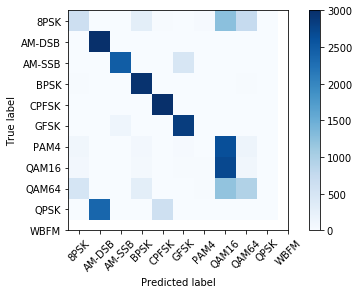

In [84]:
print('                Confusion Matrix')

plot_confusion_matrix(confusion_matrix, labels=['8PSK','AM-DSB','AM-SSB','BPSK','CPFSK','GFSK','PAM4','QAM16','QAM64','QPSK','WBFM'])

In [0]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix=confusion_matrix(test_data_index,test_mod_index[0])

In [0]:
test_mod_predicted=[]
test_mod_predicted_index=[]
for i in range(0,20):
    test_mod_predicted.append([])
    test_mod_predicted_index.append([])
    test_mod_predicted[i]= model.predict(test_SNR[i], batch_size=1024) 
    for j in range(0,30000):
        test_mod_predicted_index[i].append([])
        test_mod_predicted_index[i][j]=test_mod_predicted[i][j].argmax()


In [0]:
##index of mod labels

test_mod_index=[]
for j in range(0,20):
    test_mod_index.append([])
    for i in range(0,30000):
        test_mod_index[j].append([])
        test_mod_index[j][i]=test_mod_labels[j][i].argmax()
        

In [88]:
print(test_mod_index[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

                                          CNN Confusion Matrix for SNRs
                             ****************************************************


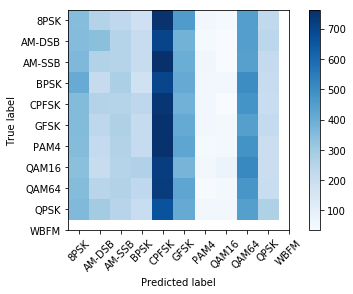

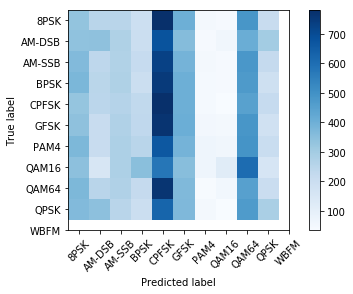

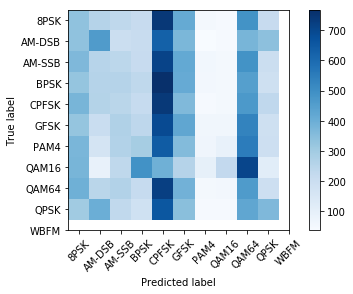

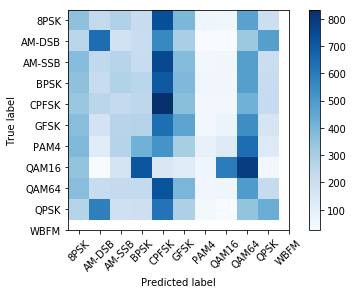

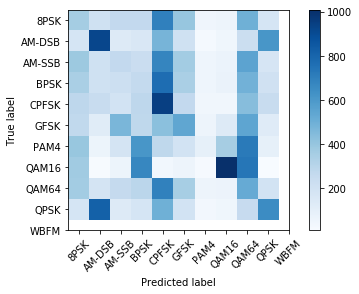

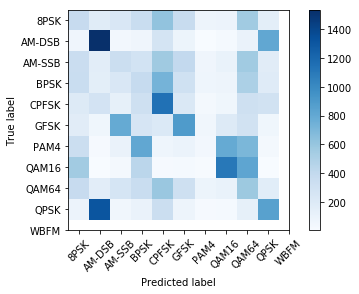

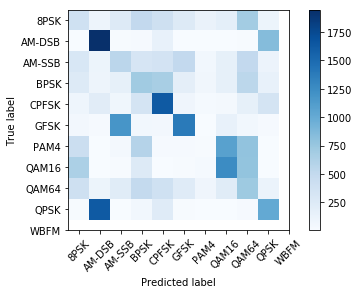

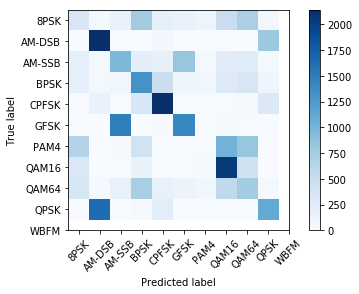

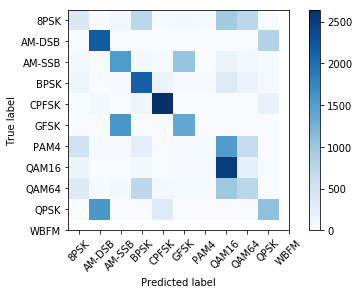

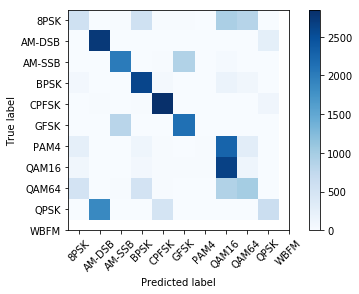

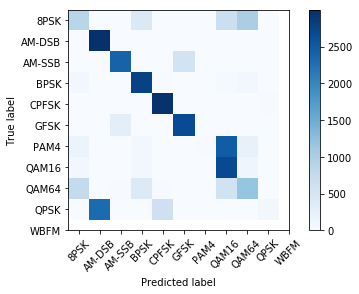

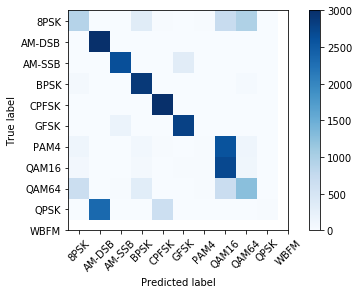

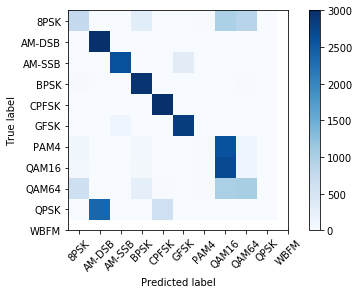

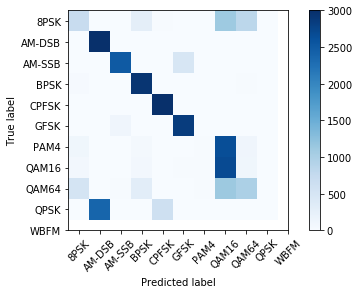

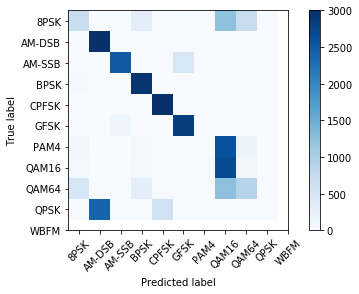

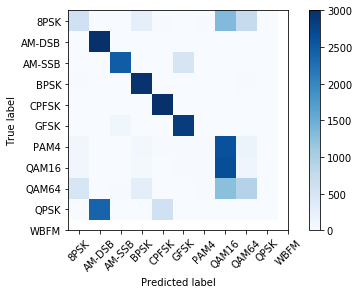

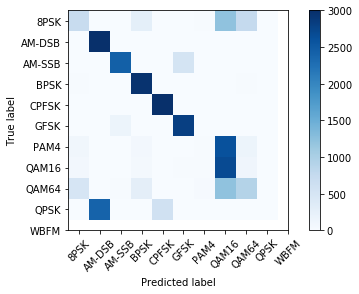

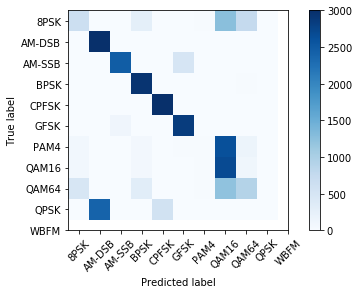

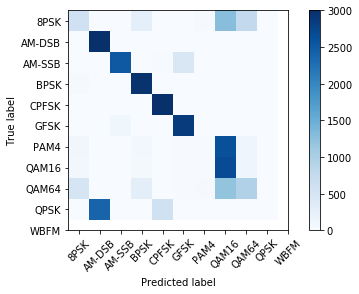

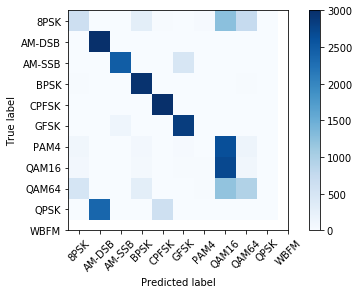

In [94]:
print('                                          CNN Confusion Matrix for SNRs')
print('                             ****************************************************')
for i in range(0,20):
    from sklearn.metrics import confusion_matrix
    confusion_matrix=confusion_matrix(test_mod_index[i],test_mod_predicted_index[i])
    plt.figure()
    plot_confusion_matrix(confusion_matrix, labels=['8PSK','AM-DSB','AM-SSB','BPSK','CPFSK','GFSK','PAM4','QAM16','QAM64','QPSK','WBFM'])
